# <span style="font-size:1.2em;"> Predicting Air Quality Index Data Preparation & Analysis
Angela Kim

## Overview

Includes four major pollutants (Nitrogen Dioxide, Sulphur Dioxide, Carbon Monoxide and Ozone).

- State Code : The code allocated by US EPA to each state
- County code : The code of counties in a specific state allocated by US EPA
- Site Num : The site number in a specific county allocated by US EPA
- Address: Address of the monitoring site
- State : State of monitoring site
- County : County of monitoring site
- City : City of the monitoring site
- Date Local : Date of monitoring


The four pollutants (NO2, O3, SO2 and O3) each has 5 specific columns. For instance, for NO2:

- NO2 Units : The units measured for NO2
- NO2 Mean : The arithmetic mean of concentration of NO2 within a given day
- NO2 AQI : The calculated air quality index of NO2 within a given day
- NO2 1st Max Value : The maximum value obtained for NO2 concentration in a given day
- NO2 1st Max Hour : The hour when the maximum NO2 concentration was recorded in a given day

## Business Understanding

texty text.

## Data Understanding

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse


# Function to calculate RMSE
def rmse(y, y_hat):
    return mse(y, y_hat, squared=False)

In [2]:
# Import dataset
df = pd.read_csv('pollution_2000_2021.csv')

In [3]:
# Preview dataset
df.head(10)

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 1st Max Value,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58
5,2000-01-06,2000,1,6,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.014000,0.025,...,9,41.0,6.761905,17.0,7,24.0,39.950000,73.0,8,71
6,2000-01-07,2000,1,7,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.013235,0.024,...,23,40.0,8.666667,21.0,7,30.0,29.625000,43.0,9,41
7,2000-01-08,2000,1,8,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.011176,0.020,...,2,57.0,8.250000,18.0,0,26.0,29.666667,41.0,0,39
8,2000-01-09,2000,1,9,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.012588,0.022,...,2,32.0,6.500000,13.0,19,19.0,25.083333,37.0,20,35
9,2000-01-10,2000,1,10,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.010000,0.015,...,23,42.0,9.958333,21.0,20,30.0,37.666667,70.0,20,68


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608699 entries, 0 to 608698
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               608699 non-null  object 
 1   Year               608699 non-null  int64  
 2   Month              608699 non-null  int64  
 3   Day                608699 non-null  int64  
 4   Address            608699 non-null  object 
 5   State              608699 non-null  object 
 6   County             608699 non-null  object 
 7   City               608699 non-null  object 
 8   O3 Mean            608699 non-null  float64
 9   O3 1st Max Value   608699 non-null  float64
 10  O3 1st Max Hour    608699 non-null  int64  
 11  O3 AQI             608699 non-null  int64  
 12  CO Mean            608699 non-null  float64
 13  CO 1st Max Value   608699 non-null  float64
 14  CO 1st Max Hour    608699 non-null  int64  
 15  CO AQI             608699 non-null  float64
 16  SO

In [5]:
df.describe()

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000
mean,2011.040529,6.508670,15.737176,0.028477,0.038903,10.773469,39.112517,0.337258,0.476798,5.971042,5.377387,1.523358,4.210271,8.851891,5.568708,11.738067,23.610711,11.606845,22.124240
std,6.122558,3.310633,8.806949,0.012218,0.015031,3.308152,22.480864,0.282958,0.446321,7.739380,5.142873,2.495094,7.983793,6.774720,10.736164,9.083091,15.412489,7.881014,14.610125
min,2000.000000,1.000000,1.000000,-0.000706,0.000000,7.000000,0.000000,-0.437500,-0.400000,0.000000,0.000000,-2.508333,-2.300000,0.000000,0.000000,-4.629167,-4.400000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,0.019647,0.029000,9.000000,27.000000,0.179167,0.200000,0.000000,2.000000,0.187500,0.600000,3.000000,0.000000,4.978261,11.200000,5.000000,10.000000
50%,2012.000000,7.000000,16.000000,0.028235,0.038000,10.000000,35.000000,0.262500,0.400000,2.000000,5.000000,0.666667,1.700000,8.000000,1.000000,9.541667,21.800000,9.000000,20.000000
75%,2016.000000,9.000000,23.000000,0.036765,0.048000,11.000000,44.000000,0.420833,0.600000,9.000000,7.000000,1.772727,4.000000,13.000000,6.000000,16.304348,33.700000,20.000000,31.000000
max,2021.000000,12.000000,31.000000,0.107353,0.140000,23.000000,237.000000,7.508333,15.500000,23.000000,201.000000,321.625000,351.000000,23.000000,200.000000,140.650000,269.200000,23.000000,133.000000


In [ ]:
# groupby datetime, state, city ??????

In [25]:
df[['Date', 'State', 'O3 AQI', 'CO AQI', 'NO2 AQI', 'SO2 AQI']]

,Date,State,O3 AQI,CO AQI,NO2 AQI,SO2 AQI
0,2000-01-01,Arizona,37,25.0,46,13.0
1,2000-01-02,Arizona,30,26.0,34,4.0
2,2000-01-03,Arizona,15,28.0,48,16.0
3,2000-01-04,Arizona,31,34.0,72,23.0
4,2000-01-05,Arizona,11,42.0,58,21.0
...,...,...,...,...,...,...
608694,2021-06-26,Wyoming,45,1.0,2,0.0
608695,2021-06-27,Wyoming,39,1.0,2,0.0
608696,2021-06-28,Wyoming,46,1.0,5,0.0
608697,2021-06-29,Wyoming,61,1.0,7,0.0


In [31]:
df_state = df[['Date', 'State', 'O3 AQI', 'CO AQI', 'NO2 AQI', 'SO2 AQI']]
df_state = df_state.groupby(['State', 'Date']).mean()
# df_state_grouped = df_state.groupby(level=0)

In [32]:
df_state

O3 AQI  CO AQI  NO2 AQI  SO2 AQI
State   Date                                        
Alabama 2013-12-01    24.0     6.0     37.0      1.0
        2013-12-02    11.0     6.0     30.0      3.0
        2013-12-03    11.0     3.0     21.0      3.0
        2013-12-04    13.0     2.0     18.0      1.0
        2013-12-05    13.0     2.0     15.0      1.0
...                    ...     ...      ...      ...
Wyoming 2021-06-26    45.0     1.0      2.0      0.0
        2021-06-27    39.0     1.0      2.0      0.0
        2021-06-28    46.0     1.0      5.0      0.0
        2021-06-29    61.0     1.0      7.0      0.0
        2021-06-30    50.0     1.0      7.0      0.0

[226602 rows x 4 columns]

In [43]:
O3_state = df_state[['O3 AQI']]
O3_state.mean()

O3 AQI    37.514372
dtype: float64

AxisError: axis 4 is out of bounds for array of dimension 0

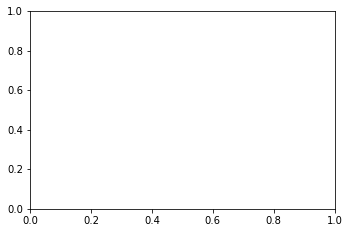

In [34]:
## Plot 4 AQIs with top 4 states
plt.figure(figsize=(12,8))

# O3 AQI
plt.subplot(222)
O3_state = df_state['O3 AQI']
O3Top = O3_state.mean().nlargest(4).index
for i in range(len(O3Top)):
    O3_state.get_group(O3Top[i]).groupby(pd.Grouper(level='Date', freq='M')).mean().plot()
plt.legend(O3Top,loc=3, fontsize='small')
plt.title('O3 AQI')

# CO AQI
plt.subplot(224)
CO_state = df_state['CO AQI']
COTop = CO_state.mean().nlargest(4).index
for i in range(len(COTop)):
    pollCO.get_group(COTop[i]).groupby(pd.Grouper(level='Date',freq='M')).mean().plot()
plt.legend(COTop,loc=3,fontsize='small')
plt.title('CO AQI')

# SO2 AQI
plt.subplot(223)
SO2_state = df_state['SO2 AQI']
SO2Top = SO2_state.mean().nlargest(4).index
for i in range(len(pollSO2Top)):
    pollSO2.get_group(SO2Top[i]).groupby(pd.Grouper(level='Date',freq='M')).mean().plot()
plt.legend(SO2Top,loc=3,fontsize='small')
plt.title('SO2 AQI')

# NO2 AQI
plt.subplot(221)
NO2_state = df_state['NO2 AQI']
NO2Top = NO2_state.mean().nlargest(4).index
for i in range(len(NO2Top)):
    pollNO2.get_group(NO2Top[i]).groupby(pd.Grouper(level='Date',freq='M')).mean().plot()
plt.legend(NO2Top,loc=3,fontsize='small')
plt.title('NO2 AQI')


plt.tight_layout()
plt.show();

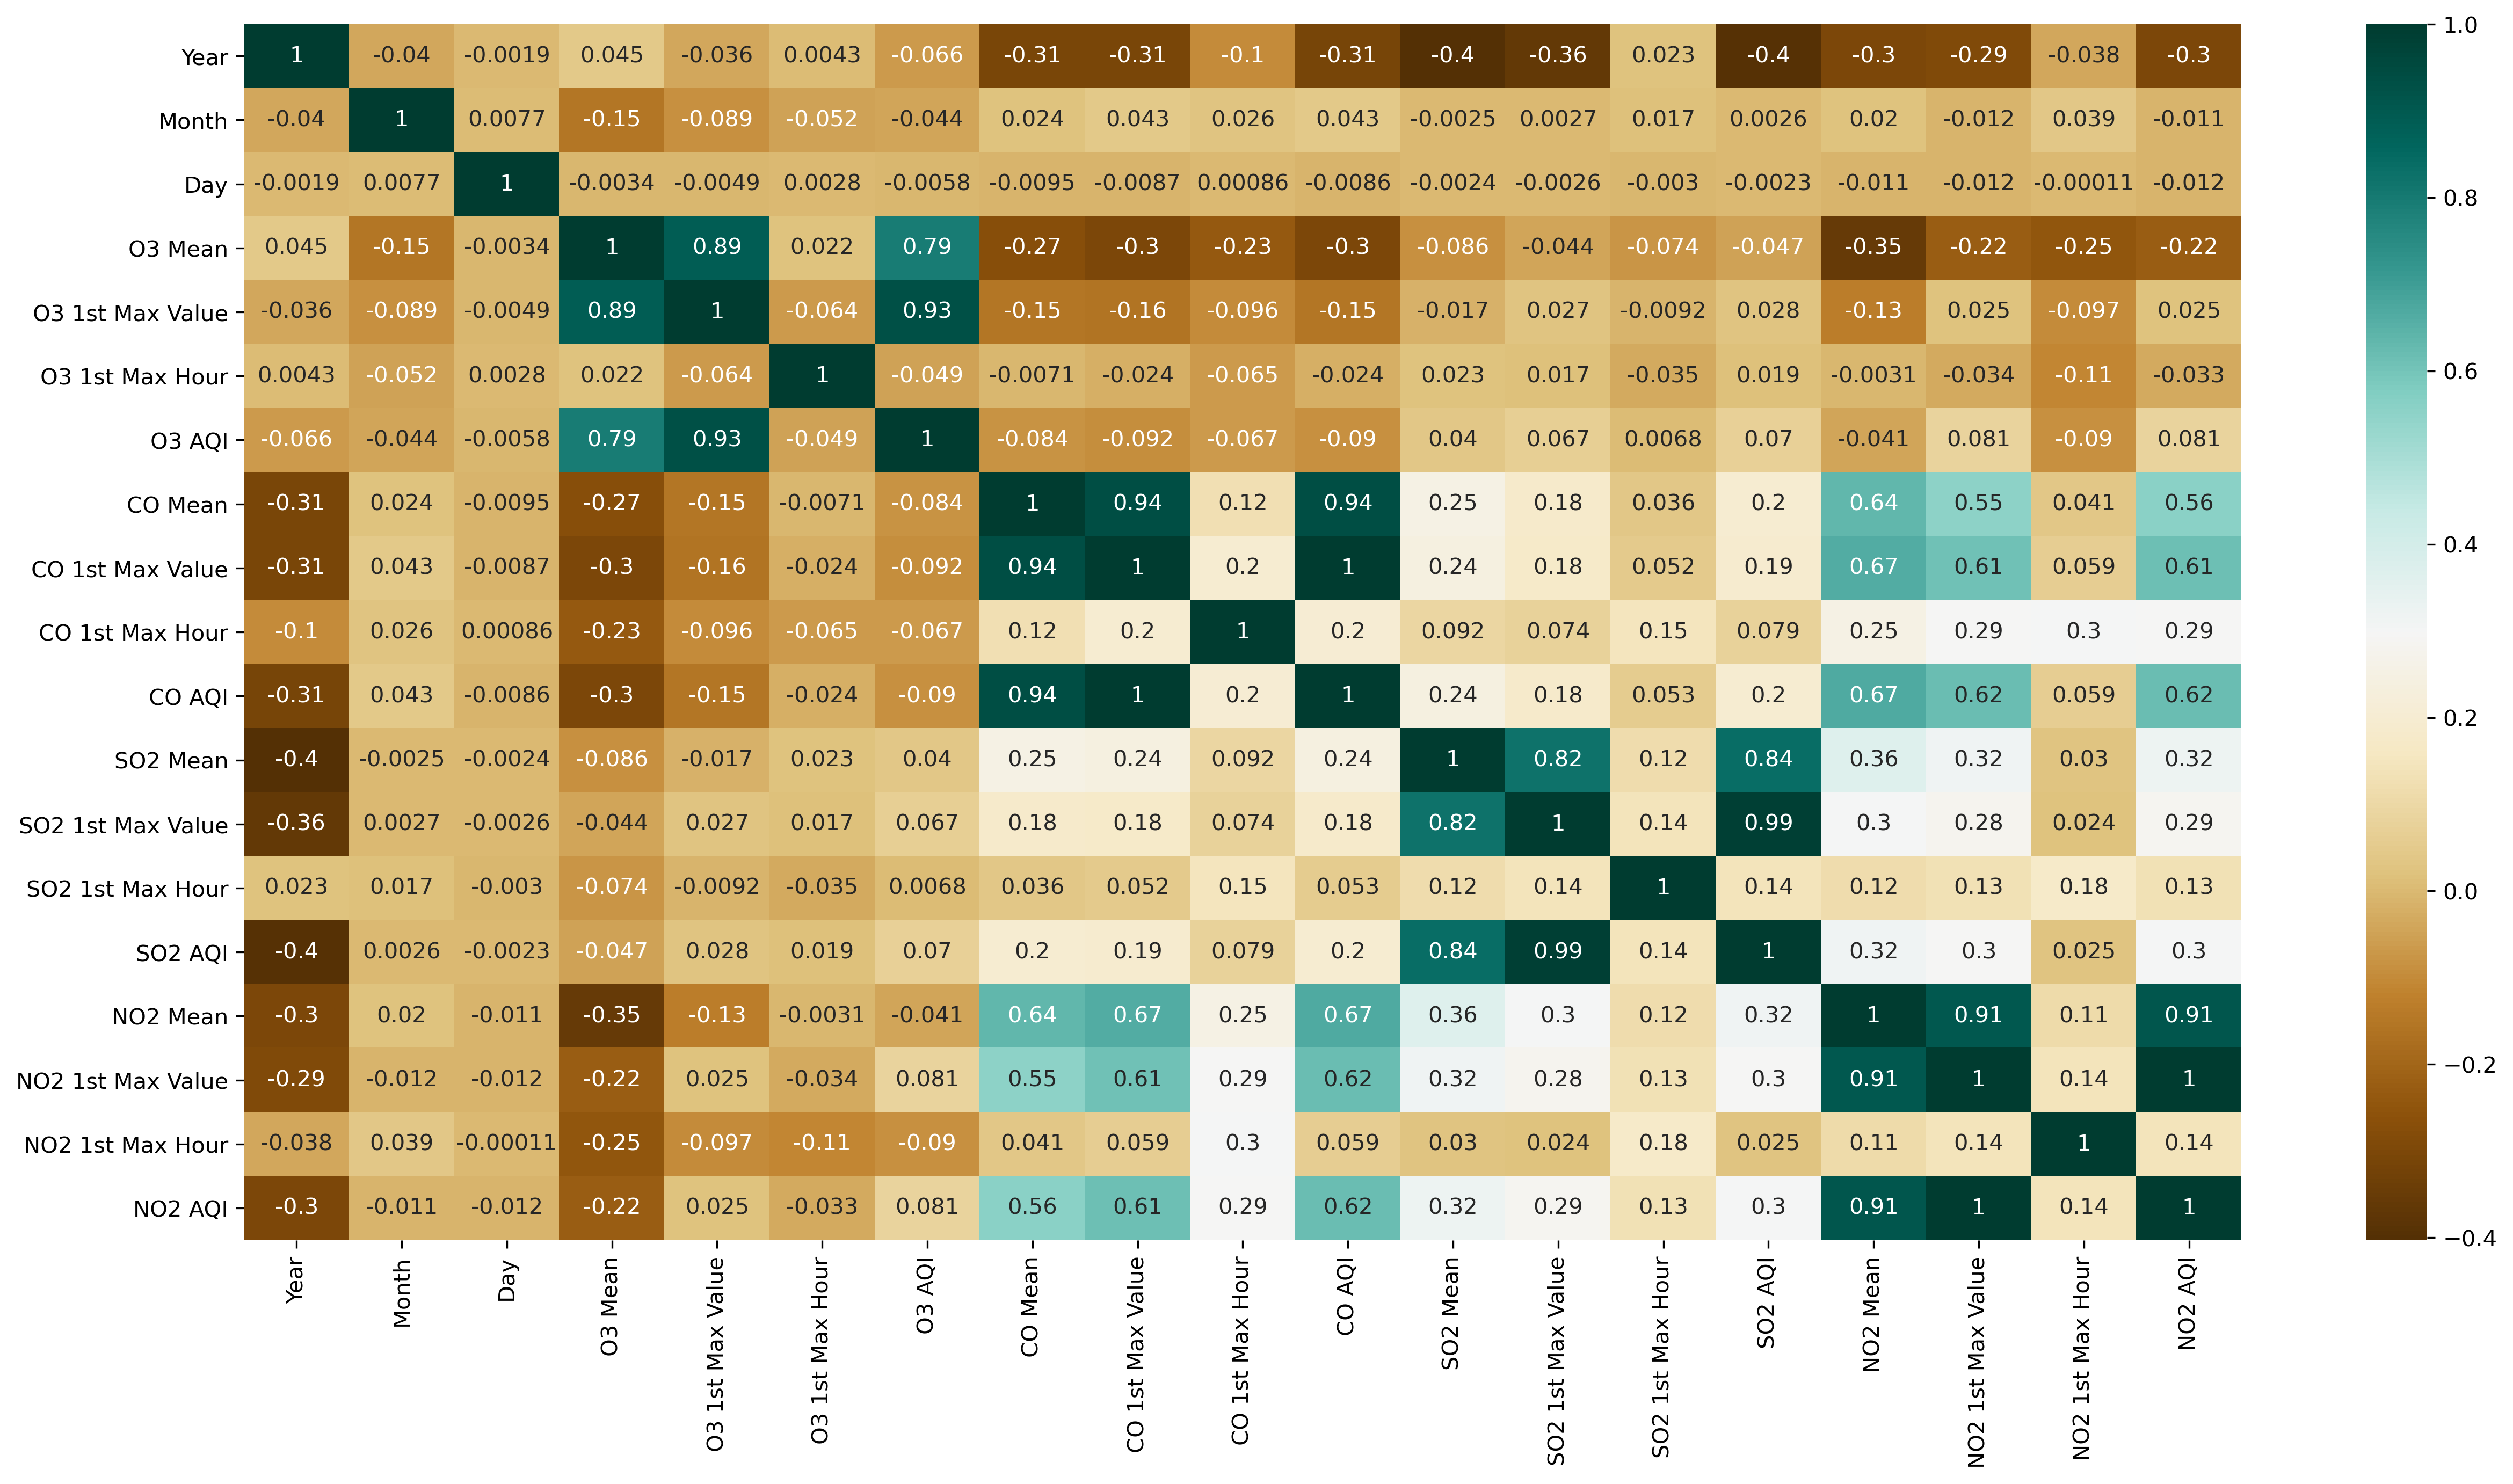

In [7]:
plt.figure(figsize=(20,10), dpi=300)
c = df.corr()
sns.heatmap(c, cmap='BrBG', annot=True);

In [8]:
X = df.drop('O3 AQI', axis=1)
y = df['O3 AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
cols_encode = ['Address', 'State', 'County', 'City']
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe_train = ohe.fit_transform(X_train[cols_encode])
ohe_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names(cols_encode), index=X_train.index)

In [15]:
ohe_test = ohe.transform(X_test[cols_encode])
ohe_test = pd.DataFrame(ohe_test, columns=ohe.get_feature_names(cols_encode), index=X_test.index)
ohe_test

,Address_ 6100 ARLINGTON BLVD MONTG WARD,Address_ Center St,Address_10 ARKANSAS ST.,"Address_100 WHITNEY YOUNG CIRCLE, SAN FRANCISCO",Address_100 West Temple Pl,Address_1005 INDUSTRIAL ROAD,Address_1005 W. WELDON AVENUE,Address_10267 ST CHARLES ROCK ROAD,"Address_1029 ETHEL ST, CALEXICO HIGH SCHOOL",Address_10537 FLOYD SMITH DRIVE,...,City_Waco,City_Washington,City_Welby,City_West Los Angeles,City_Westport,City_Wilkes-Barre,City_Wilmington,City_Winston-Salem,City_Winter Park,City_York
216913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
371462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54696,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
baseline = DummyRegressor()
baseline.fit(ohe_train, y_train)
yhat_train = baseline.predict(ohe_train)
yhat_test = baseline.predict(ohe_test)
train_rmse = rmse(y_train, yhat_train)
test_rmse = rmse(y_test, yhat_test)
print(train_rmse, test_rmse)

22.536379723824872 22.31351456681779


In [23]:
baseline.score(ohe_test, y_test)

-3.596017174878341e-05

In [22]:
lr = LinearRegression()
lr.fit(ohe_train, y_train)
y_hat_train = lr.predict(ohe_train)
y_hat_test = lr.predict(ohe_test)
train_rmse = rmse(y_train, y_hat_train)
test_rmse = rmse(y_test, y_hat_test)
print(train_rmse, test_rmse)

lr.score(ohe_test, y_test)

21.037391250359352 20.78566308166148


0.13222442404058066